# importing libraries and data

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from random import randint  
from tensorflow.keras.layers import (
    Input,
    Dense,
    BatchNormalization,
    Dropout,
    Activation,
    Flatten,
    MaxPool2D,
    Conv2D,
)

# I'm running this on the GPU (it's alot faster) if you want to do it follow link : https://www.tensorflow.org/install/pip#hardware_requirements
# Disclaimer : it takes some time :sob:

In [104]:
tf.__version__

'2.10.0'

In [105]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [106]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [107]:
labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

In [108]:
X_train.shape

(50000, 32, 32, 3)

In [109]:
y_train.shape

(50000, 1)

In [110]:
X_test.shape

(10000, 32, 32, 3)

In [111]:
y_test.shape

(10000, 1)

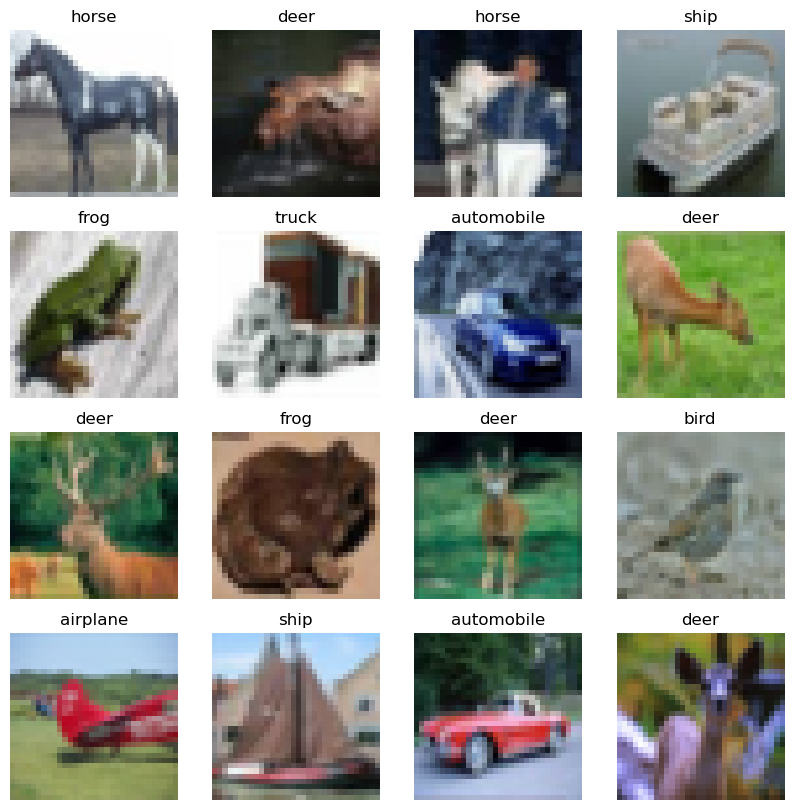

In [112]:
plt.figure(figsize=(10,10))
for i in range(1,17):
        index=randint(0,49999)
        plt.subplot(4,4,i)
        plt.imshow(X_train[index])
        plt.axis("off")
        plt.title(labels[y_train[index][0]])

In [113]:
# scaling
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train=X_train/255
X_test=X_test/255


In [114]:
y_train_enc=to_categorical(y_train,10)
y_test_enc=to_categorical(y_test,10)

# Model

In [115]:
model=Sequential()

In [116]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32, 32, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

In [117]:
model.compile('adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 13, 13, 32)      

In [119]:
with tf.device('/gpu:0'):
    hist=model.fit(X_train,y_train,batch_size=32,epochs=20,verbose=1)

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6363 - accuracy: 0.4033
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3315 - accuracy: 0.5229
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2176 - accuracy: 0.5682
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1491 - accuracy: 0.5936
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0989 - accuracy: 0.6133
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0575 - accuracy: 0.6267
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0224 - accuracy: 0.6416
Epoch 8/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9942 - accuracy: 0.6507
Epoch 9/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9661 - accuracy: 0.6631
Epoch 10/20
1563/1563 [==============================] - 11s 7ms/step - loss: 

In [120]:
X_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [121]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7529 - accuracy: 0.7362


[0.7529425024986267, 0.7361999750137329]

Text(0, 0.5, 'loss')

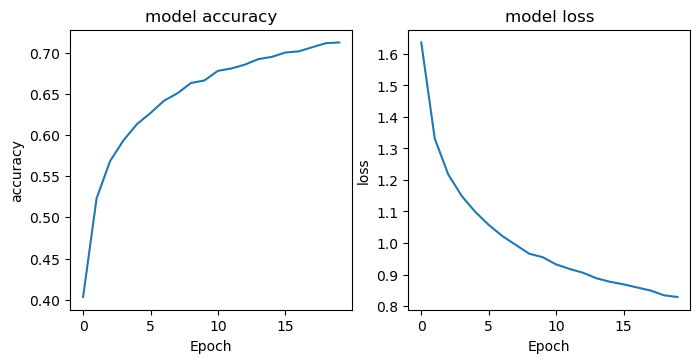

In [122]:
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.title("model accuracy")
plt.plot(hist.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.subplot(2,2,2)
plt.title("model loss")
plt.plot(hist.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")

In [123]:
model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


array([[2.13986239e-03, 1.99750531e-03, 6.20828755e-03, ...,
        3.61259561e-03, 1.26725420e-01, 1.55828928e-03],
       [1.37156453e-02, 1.15519628e-01, 7.16518698e-05, ...,
        5.60412445e-05, 8.63605261e-01, 6.70664757e-03],
       [1.79042295e-02, 1.99988093e-02, 1.39247975e-03, ...,
        6.00251835e-04, 9.38682437e-01, 1.68362223e-02],
       ...,
       [1.41255105e-05, 4.21763762e-05, 7.04326993e-03, ...,
        6.57967245e-03, 3.20278232e-05, 9.73680071e-05],
       [9.85267535e-02, 6.77240610e-01, 3.50953192e-02, ...,
        4.38754484e-02, 4.52855090e-03, 2.94834282e-02],
       [2.94818869e-06, 2.78003938e-07, 8.24589733e-05, ...,
        9.92308855e-01, 1.04419689e-06, 2.57617853e-06]], dtype=float32)

1/1 [==============================] - 0s 23ms/step


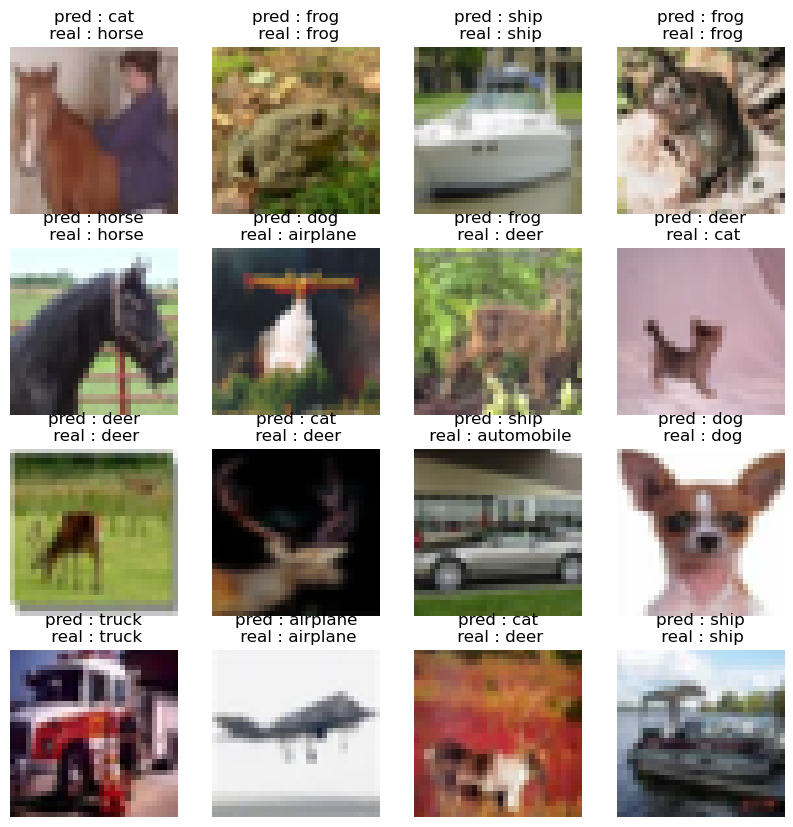

In [124]:
plt.figure(figsize=(10, 10))
for i in range(1, 17):
    index = randint(0, 9999)
    plt.subplot(4, 4, i)
    plt.imshow(X_test[index])
    plt.axis("off")
    plt.title(
        label="pred : "
        + str(labels[np.argmax(model.predict(tf.expand_dims(X_test[index], 0)))])
        + "\n real : "
        + str(labels[y_test[index][0]])
    )

In [125]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 3ms/step


<Axes: >

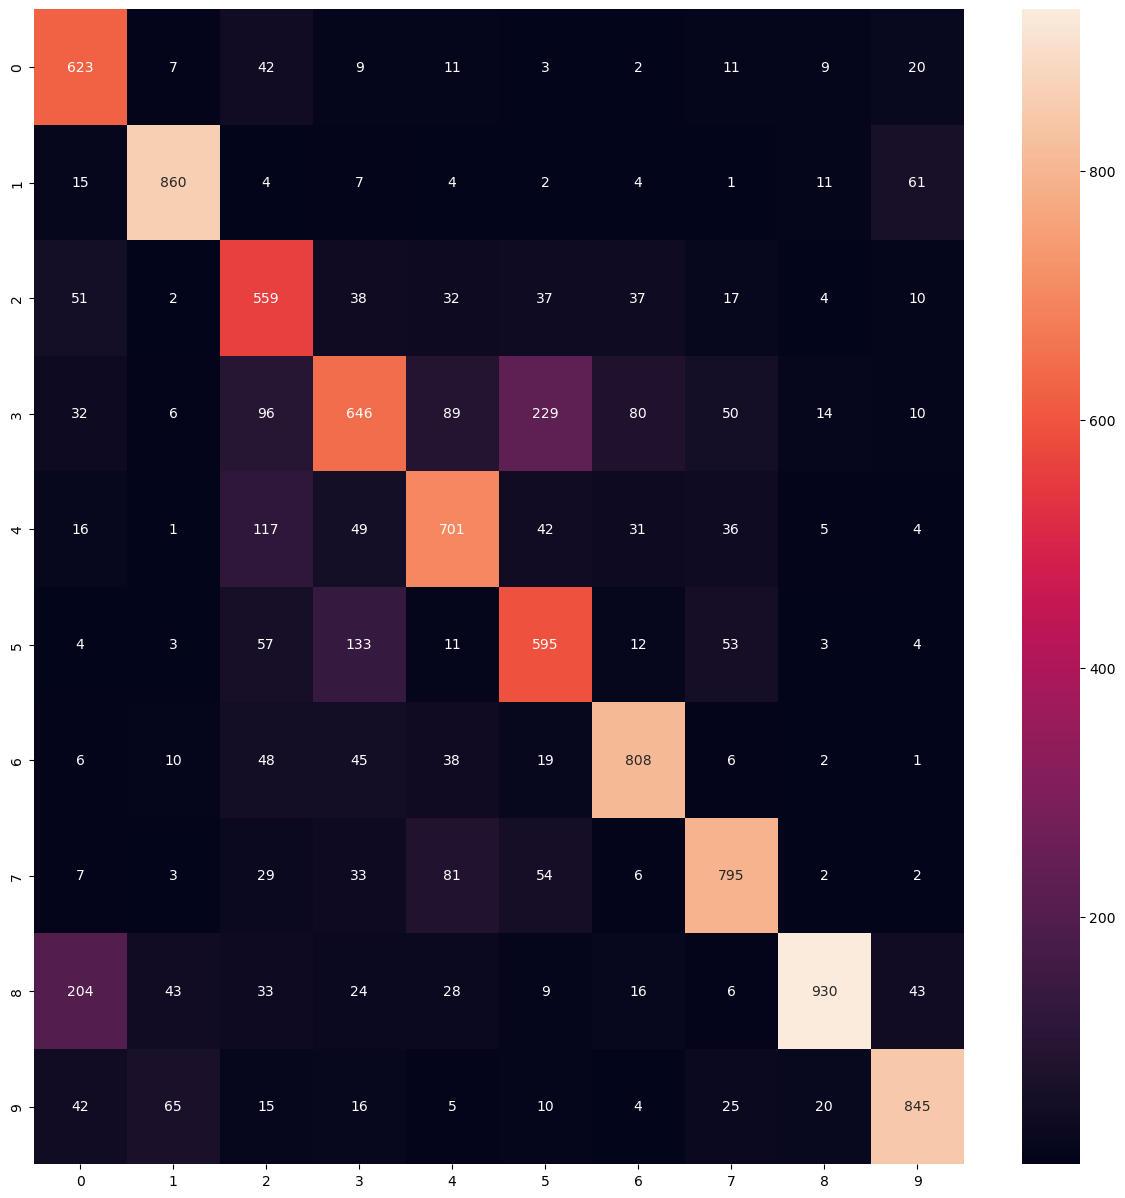

In [126]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt="d")

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72      1000
           1       0.89      0.86      0.87      1000
           2       0.71      0.56      0.63      1000
           3       0.52      0.65      0.57      1000
           4       0.70      0.70      0.70      1000
           5       0.68      0.59      0.63      1000
           6       0.82      0.81      0.81      1000
           7       0.79      0.80      0.79      1000
           8       0.70      0.93      0.80      1000
           9       0.81      0.84      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [129]:
model.save("model_loss_75_accuracy_73.h5")
model.save("model_loss_75_accuracy_73.keras")